In [101]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import regex as re
import string
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
nltk.download('punkt')


from gensim.models import Word2Vec
from tensorflow import random as tf_random
from tensorflow import keras
from tensorflow.keras import layers

import warnings 
warnings.filterwarnings(action = 'ignore')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\gravi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


AttributeError: module 'numpy' has no attribute 'object'.
`np.object` was a deprecated alias for the builtin `object`. To avoid this error in existing code, use `object` by itself. Doing this will not modify any behavior and is safe. 
The aliases was originally deprecated in NumPy 1.20; for more details and guidance see the original release note at:
    https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

In [104]:
print(np.__version__)

1.24.4


In [2]:
reddit = pd.read_csv('sample_comments.csv', index_col=0)

reddit.head()

,label,comment
139484,0,Nope.
638093,0,Donde esta la biblioteca?
662570,0,I feel bad for the mummy... not even the minio...
652534,1,"The Pirate Bay, of course!"
411846,1,That's exactly how multiple photographers ende...


In [25]:
# custom tokenizer function

def tokenizer(series):
    
    corpus = series.values
    tokens = []
    
    for document in corpus:
        #removing punctuation
        for punc in string.punctuation:
            document = document.replace(punc, '')
        # removing numbers and splitting sentences    
        document = re.sub("\d+", "", document).lower()
        tokens.append(document.split(' '))
        
    
        

    return tokens

In [4]:
X = reddit['comment']
y = reddit['label']

In [5]:
X.values

array(['Nope.', 'Donde esta la biblioteca?',
       'I feel bad for the mummy... not even the minions want to get close to him :(',
       ...,
       'You have to remember that only their black lives matter.......................',
       "Learning few words of the local language when you do to a country wouldn't kill you.",
       'We could have the pre and post parties at the new fake 400 bar!'],
      dtype=object)

In [26]:
tokenizer(X[:2])

[['nope'], ['donde', 'esta', 'la', 'biblioteca']]

In [29]:
tokenized_data = tokenizer(X)

In [30]:
model = Word2Vec(tokenized_data, window=5, min_count=1, workers=4)
model.train(tokenized_data, total_examples=model.corpus_count, epochs=model.epochs)

(10359209, 13178775)

In [17]:
model['related'].shape

(100,)

In [31]:
model.most_similar('sarcastic')

[('facetious', 0.8200381994247437),
 ('aggressor', 0.7399939298629761),
 ('pedantic', 0.7361928224563599),
 ('bitbybit', 0.7308194041252136),
 ('detained', 0.7280286550521851),
 ('achievementist', 0.7197221517562866),
 ('torquen', 0.6856881380081177),
 ('tattletale', 0.6836557388305664),
 ('joking', 0.6791605949401855),
 ('obtuse', 0.6784327030181885)]

In [32]:
model.most_similar('sarcasm')

[('text', 0.6611473560333252),
 ('tag', 0.6478747725486755),
 ('comment', 0.6296629905700684),
 ('username', 0.6222316026687622),
 ('nsfw', 0.6111559867858887),
 ('statement', 0.6013941168785095),
 ('reply', 0.5901398658752441),
 ('satire', 0.5847964286804199),
 ('context', 0.5755115747451782),
 ('post', 0.5723748803138733)]

In [33]:
model.most_similar('satire')

[('inaccurate', 0.747829258441925),
 ('infuriating', 0.742061197757721),
 ('wellresearched', 0.7268141508102417),
 ('factually', 0.7253165245056152),
 ('politico', 0.7236864566802979),
 ('flawed', 0.7221634387969971),
 ('intentional', 0.7181951999664307),
 ('terrifying', 0.716544508934021),
 ('contagious', 0.7157062292098999),
 ('staged', 0.7150063514709473)]

In [34]:
model.most_similar(positive=['joke', 'sarcastic'])

[('joking', 0.6760741472244263),
 ('bitbybit', 0.6599159240722656),
 ('aggressor', 0.6523123979568481),
 ('creepy', 0.6496952772140503),
 ('soundless', 0.6395905017852783),
 ('torquen', 0.6372244358062744),
 ('facetious', 0.6243019104003906),
 ('detained', 0.6224038600921631),
 ('wowi', 0.6156713366508484),
 ('pedantic', 0.614473283290863)]

In [36]:
model.most_similar(positive=['pedantic', 'sarcastic'], negative=['joke'], topn=5)

[('facetious', 0.7672279477119446),
 ('staggered', 0.7110379338264465),
 ('achievementist', 0.7010456323623657),
 ('gaystop', 0.6858866810798645),
 ('reprinted', 0.6763424873352051)]

In [38]:
model.most_similar(positive=['politics', 'sarcasm'])

[('bigotry', 0.6851497888565063),
 ('purely', 0.6750657558441162),
 ('science', 0.6593804955482483),
 ('reality', 0.6412777900695801),
 ('islam', 0.6371521353721619),
 ('statements', 0.6370168924331665),
 ('nature', 0.6303627490997314),
 ('psychology', 0.6246601343154907),
 ('feminism', 0.6218329668045044),
 ('racism', 0.6144044399261475)]

In [58]:
model.most_similar(['onion', 'facetious'])

[('irishamerican', 0.8193817138671875),
 ('duckglass', 0.8165876865386963),
 ('whiiiiiiiite', 0.8109094500541687),
 ('fujin', 0.80914705991745),
 ('ugandan', 0.8077531456947327),
 ('zweten', 0.8063657283782959),
 ('demoman', 0.8038619756698608),
 ('itsnot', 0.7996152639389038),
 ('ezzz', 0.7910621762275696),
 ('descriptor', 0.787704348564148)]

In [99]:
sarcastic = model.most_similar(positive=['sarcastic'])
genuine = model.most_similar(positive=['genuine'])

pd.DataFrame(
        data={
            "sarcastic": [word for word, sim in sarcastic], 
            "genuine": [word for word, sim in genuine]
        }
)

,sarcastic,genuine
0,facetious,bolnav
1,aggressor,maxim
2,pedantic,logomascotte
3,bitbybit,papegaai
4,detained,levelheaded
5,achievementist,bworn
6,torquen,barno
7,tattletale,crema
8,joking,bvbs
9,obtuse,hurtful


In [100]:
misleading = model.most_similar(positive=['misleading'])
honest = model.most_similar(positive=['honest'])

pd.DataFrame(
        data={
            "misleading": [word for word, sim in misleading], 
            "honest": [word for word, sim in honest]
        }
)

,misleading,honest
0,ibuki,thankful
1,clickbaitesque,fair
2,clickbait,grateful
3,clickbaity,polite
4,editorialized,copulated
5,informative,prepared
6,minekaze,oblivious
7,damien,lowerbudget
8,sensationalized,paranoid
9,credible,poached


In [41]:
words = ['duh', 'scrub', 'obvious', 'shitlord', 'forgot', 'imo', 'although', 'honestly', 'mostly', 'unfortunate']

In [42]:
sarcasm_test = []

for word in words:
    sarcasm_test.append(model[word])

In [44]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

top_words = pca.fit_transform(sarcasm_test)

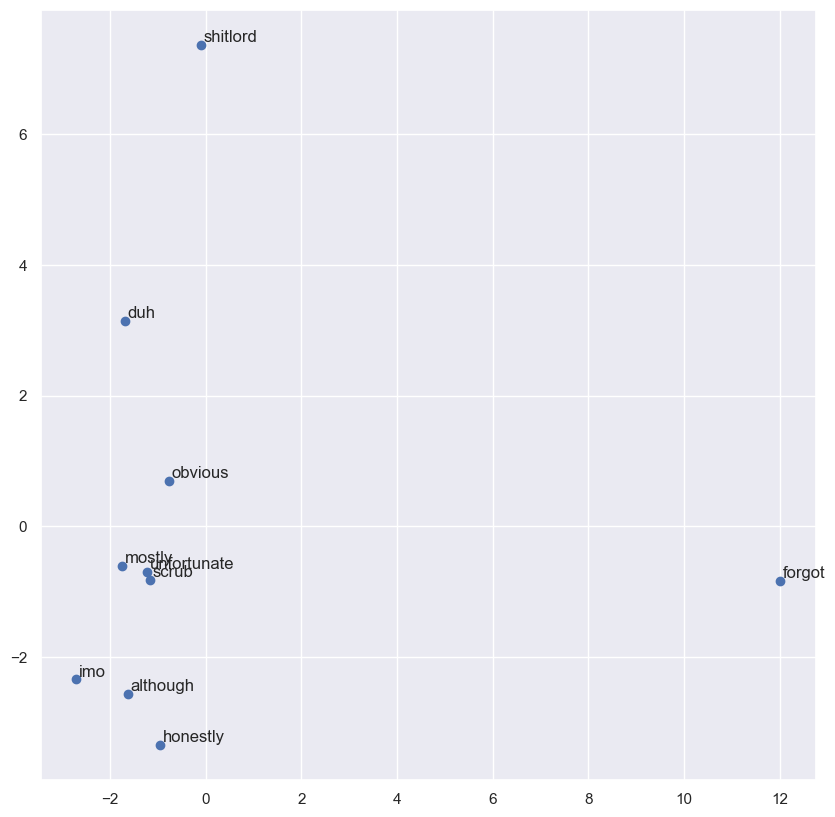

In [57]:
plt.figure(figsize=(10,10))
plt.scatter(top_words[:,0], top_words[:,1])
            
for i, word in enumerate(words):
    plt.annotate(word, xy=(top_words[i,0], top_words[i,1]), xytext=(2,2), textcoords='offset points')

plt.show()

In [69]:
def sentence(document):
    size = model.vector_size
    word_vec_document = np.zeros(size)
    count = 1
    
    for word in document:
        if word in model:
            count +=1
            word_vec_document += model[word]
    
    word_vec_document = word_vec_document / count
    
    return word_vec_document

In [72]:
test_document = 'I love my wife. She is so beautiful.'
new_test = 'call me again tomorrow, so good to see you'

In [71]:
sentence(test_document)

array([-0.52885678, -0.84388795, -0.07063611,  0.34648288, -0.23345096,
        0.37229252, -0.52895605, -0.09999683,  0.83139285,  0.08138445,
        0.23479351, -0.15873928,  0.75342337,  0.254362  ,  0.78227236,
        0.62656716,  0.93213231, -0.52491885, -0.41212827,  0.59164147,
        0.93066202,  0.5908373 , -0.95791093,  0.94603606,  0.90593493,
       -0.12341722, -0.60224916,  1.04872954,  0.47627268, -0.40923631,
       -0.4246669 , -0.38211567,  0.13269611,  0.38920892, -0.98057392,
       -0.01447803, -1.03070069,  0.22078833,  0.53197771, -0.00729407,
       -0.76435641, -0.2532123 , -0.40179776, -0.390773  ,  0.49975651,
       -0.76626047, -0.33250841, -0.49416297, -0.9573425 ,  0.46721178,
       -0.71224432, -0.74613152,  0.06532189,  0.70368039, -0.62023142,
       -1.50985969,  0.03036723, -0.47193916, -1.07754864, -0.70558512,
       -0.04252968, -0.01232722,  0.51672875, -0.3803402 , -0.04380666,
        0.14407812,  0.62714964, -0.3598528 ,  0.09475024,  0.64

In [73]:
variable = sentence(new_test)
print(len(variable))

100


In [75]:
# reddit['tokens'] = reddit['comment'].apply(tokenizer)

# reddit.head()

AttributeError: 'str' object has no attribute 'values'

In [79]:
document_vectors = [sentence(doc) for doc in tokenized_data]

In [81]:
document_vectors[0].shape

(100,)

In [82]:
X = document_vectors

In [92]:
from sklearn.model_selection import train_test_split
X_rem, X_test, y_rem, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [93]:

X_train, X_val, y_train, y_val = train_test_split(X_rem, y_rem, test_size=0.25, random_state=42)

In [94]:
len(X_train)

142131

In [95]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(max_iter=5000, random_state=42, n_jobs=4)

logreg.fit(X_train, y_train)

LogisticRegression(max_iter=5000, n_jobs=4, random_state=42)

In [97]:
from sklearn import metrics

train_predict = logreg.predict(X_train)
val_predict = logreg.predict(X_val)

print(f'train: {metrics.accuracy_score(y_train, train_predict)}')
print(f'val: {metrics.accuracy_score(y_val, val_predict)}')      

train: 0.645446806115485
val: 0.6407826417324497


In [98]:
print(f'val: {logreg.score(X_train, y_train)}')
print(f'val: {logreg.score(X_val, y_val)}')

val: 0.645446806115485
val: 0.6407826417324497


In [ ]:
np.random.seed(42)
tf.random.set_seed(42)

model = keras.Sequential()

model.add(layers.Dense(128, activation="relu"))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(32, activation="relu"))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(1, activation="sigmoid")) # output layer

model.compile(
    optimizer=keras.optimizers.Adam(), 
    loss=keras.losses.SparseCategoricalCrossentropy(),
    metrics=keras.metrics.SparseCategoricalAccuracy()
)


# train our model
history = model.fit(X_train_emb.astype(np.float32), y_train, 
                    validation_split=0.2, 
                    epochs=10, 
                    verbose=1)